df.head() - 
    index     series_id  step           timestamp     anglez    enmo  awake  \
0      0  08db4255286f     0 2018-11-05 10:00:00  30.845301  0.0447      1   
1      1  08db4255286f     1 2018-11-05 10:00:05  34.181801  0.0443      1   
2      2  08db4255286f     2 2018-11-05 10:00:10  33.877102  0.0483      1   
3      3  08db4255286f     3 2018-11-05 10:00:15  34.282101  0.0680      1   
4      4  08db4255286f     4 2018-11-05 10:00:20  34.385799  0.0768      1   

   year  month  date  ...  enmo_rolling_mean  anglez_rolling_max  \
0  2018     11     5  ...           0.055542             34.9375   
1  2018     11     5  ...           0.055542             34.9375   
2  2018     11     5  ...           0.055542             34.9375   
3  2018     11     5  ...           0.055542             34.9375   
4  2018     11     5  ...           0.065979             34.9375   

  enmo_rolling_max  anglez_rolling_std  enmo_rolling_std  \
0         0.076782            1.463867          

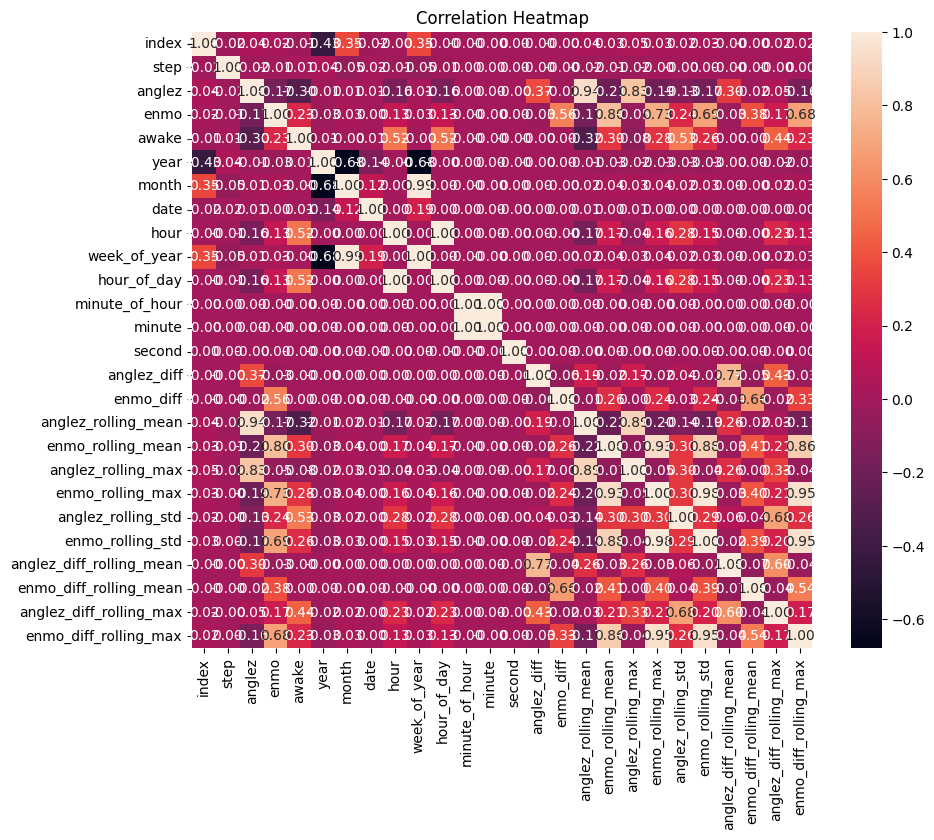

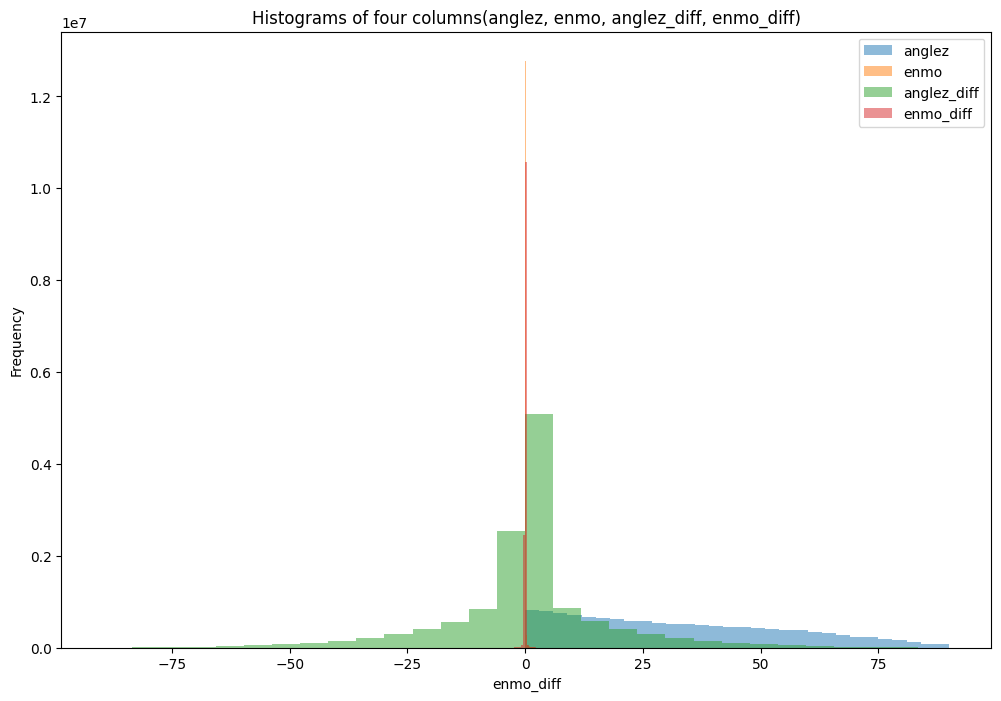

KeyboardInterrupt: 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read the Parquet file
df = pd.read_parquet('final_dataset.parquet')

# Exclude non-numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=[np.number])

# Explore the data
print('df.head() - \n', df.head())
print('df.info() - \n', df.info())
print('df.describe() - \n', df.describe())

# Visualize the data
# Correlation heat map
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Histogram of a column
column_name = ['anglez','enmo','anglez_diff','enmo_diff']


plt.figure(figsize=(12, 8))

for column in column_name:
    plt.hist(numeric_df[column], bins=30, alpha=0.5, label=column)

# Add labels and legend
plt.xlabel(column)
plt.ylabel('Frequency')
plt.legend()    
plt.title("Histograms of four columns(anglez, enmo, anglez_diff, enmo_diff)")
plt.show()

# Boxplot
#plt.figure(figsize=(12, 8))
#sns.boxplot(x='anglez', y='enmo', data=numeric_df)
#plt.title("Boxplot of anglez vs enmo")
#plt.show()

# Save the DataFrame to CSV
numeric_df.to_csv('eda.csv', index=False)